<ipython-input-76-f055409dcfbe>:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram


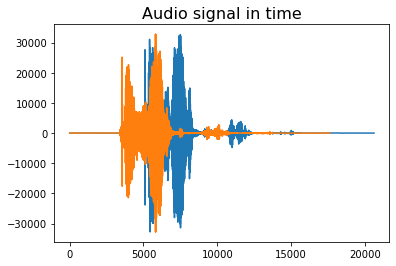

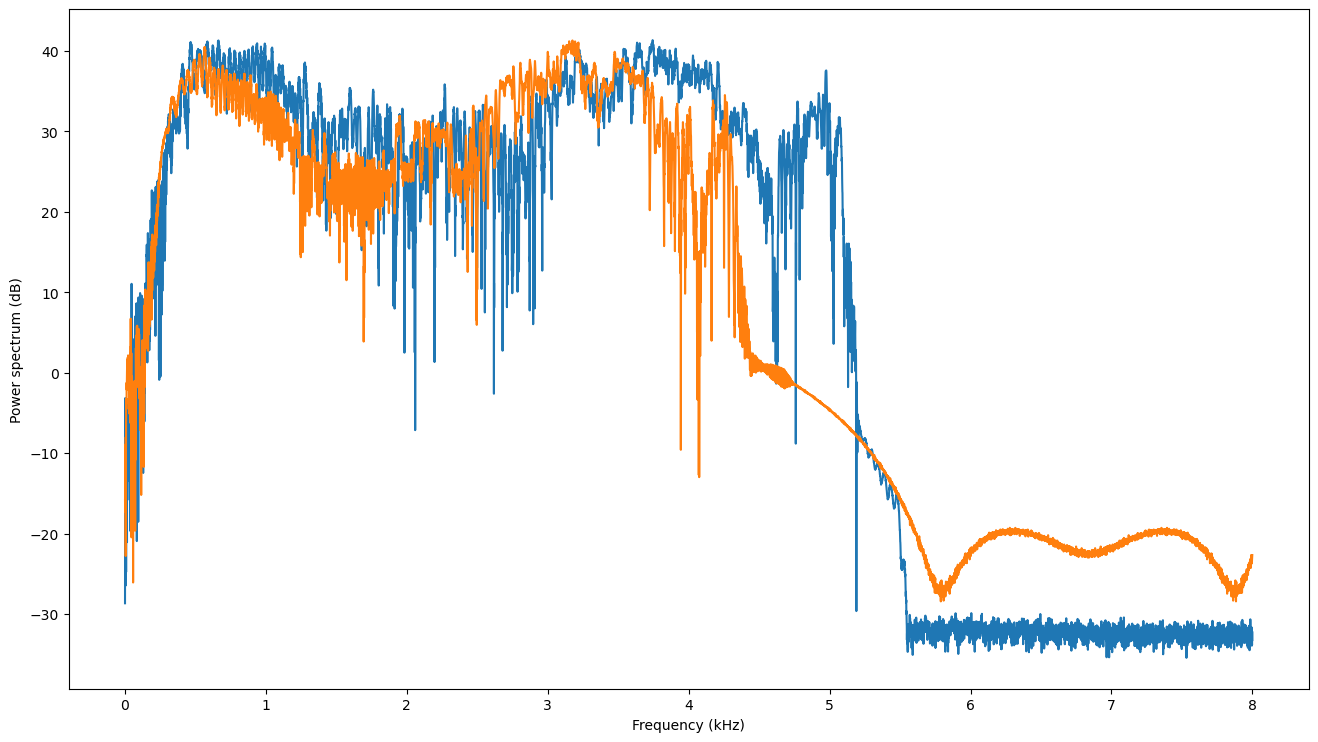

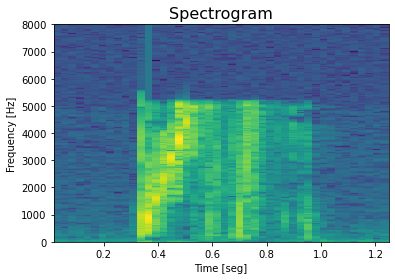

In [76]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName1 = "C://Users/yzhengk/Downloads/Pressure9.wav" # Audio File
AudioName2 = "C://Users/yzhengk/Downloads/Test9.wav"
fs, Audiodata1 = wavfile.read(AudioName1)
fs, Audiodata2 = wavfile.read(AudioName2)

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata1)
plt.plot(Audiodata2)
plt.title('Audio signal in time',size=16)

# spectrum
from scipy.fftpack import fft # fourier transform

n1 = len(Audiodata1) 
AudioFreq1 = fft(Audiodata1)
AudioFreq1 = AudioFreq1[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq1 = np.abs(AudioFreq1) # Magnitude
MagFreq1 = MagFreq1 / float(n)

n2 = len(Audiodata2) 
AudioFreq2 = fft(Audiodata2)
AudioFreq2 = AudioFreq2[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq2 = np.abs(AudioFreq2) # Magnitude
MagFreq2 = MagFreq2 / float(n)

# power spectrum
MagFreq1 = MagFreq1**2
if n % 2 > 0: # ffte odd 
    MagFreq1[1:len(MagFreq1)] = MagFreq1[1:len(MagFreq1)] * 2
else:# fft even
    MagFreq1[1:len(MagFreq1) -1] = MagFreq1[1:len(MagFreq1) - 1] * 2 
    
MagFreq2 = MagFreq2**2
if n % 2 > 0: # ffte odd 
    MagFreq2[1:len(MagFreq2)] = MagFreq2[1:len(MagFreq2)] * 2
else:# fft even
    MagFreq2[1:len(MagFreq2) -1] = MagFreq2[1:len(MagFreq2) - 1] * 2 

plt.figure(figsize=(16, 9), dpi=100)
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq1)) #Power spectrum
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq2)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seg]')
plt.title('Spectrogram',size=16);

plt.show()

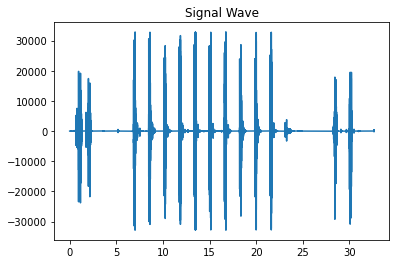

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open("X://Ye/Smart Watch Authentication/GSET/Test.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype='int16')
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave")
plt.plot(Time, signal)
plt.show()